In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [2]:
# only a couple thousand data points, do not need AWS
train_har = pd.read_csv('capstone_data/train_har.csv', index_col=0, parse_dates=True)
test_har = pd.read_csv('capstone_data/test_har.csv', index_col=0, parse_dates=True)

print(train_har.index)
print(test_har)

DatetimeIndex(['2005-01-25', '2005-01-26', '2005-01-27', '2005-01-28',
               '2005-01-31', '2005-02-01', '2005-02-02', '2005-02-03',
               '2005-02-04', '2005-02-07',
               ...
               '2017-12-15', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22', '2017-12-26', '2017-12-27',
               '2017-12-28', '2017-12-29'],
              dtype='datetime64[ns]', name='DATE', length=3256, freq=None)
               CLOSE     DAILY    WEEKLY   MONTHLY
DATE                                              
2018-01-02  2.279316  2.401525  2.335412  2.298117
2018-01-03  2.213754  2.279316  2.312707  2.295246
2018-01-04  2.221375  2.213754  2.287279  2.294438
2018-01-05  2.221375  2.221375  2.267469  2.289865
2018-01-08  2.253395  2.221375  2.237843  2.285675
...              ...       ...       ...       ...
2019-12-24  2.539237  2.534490  2.531618  2.613098
2019-12-26  2.537657  2.539237  2.532728  2.598571
2019-12-27  2.597491  2.5

In [3]:
har = LinearRegression().fit(train_har[["DAILY", "WEEKLY","MONTHLY"]],train_har['CLOSE'])

In [4]:
print(har.intercept_)
print(har.coef_)

0.027128716485602222
[ 0.45947217  0.61765932 -0.08669264]


In [5]:
test_har['PRED'] = har.predict(test_har[["DAILY", "WEEKLY","MONTHLY"]])

In [6]:
print(test_har)

rmse = mean_squared_error(np.exp(test_har['CLOSE']), np.exp(test_har['PRED']), squared=False)
print(rmse)

               CLOSE     DAILY    WEEKLY   MONTHLY      PRED
DATE                                                        
2018-01-02  2.279316  2.401525  2.335412  2.298117  2.373822
2018-01-03  2.213754  2.279316  2.312707  2.295246  2.303895
2018-01-04  2.221375  2.213754  2.287279  2.294438  2.258135
2018-01-05  2.221375  2.221375  2.267469  2.289865  2.249798
2018-01-08  2.253395  2.221375  2.237843  2.285675  2.231862
...              ...       ...       ...       ...       ...
2019-12-24  2.539237  2.534490  2.531618  2.613098  2.528798
2019-12-26  2.537657  2.539237  2.532728  2.598571  2.532924
2019-12-27  2.597491  2.537657  2.547081  2.592500  2.541589
2019-12-30  2.695978  2.597491  2.580971  2.593779  2.589903
2019-12-31  2.623218  2.695978  2.598716  2.594508  2.646052

[503 rows x 5 columns]
1.6467779246268646


Text(0.5, 1.0, 'HAR - Predicted vs Actual VIX Prices During Test Period')

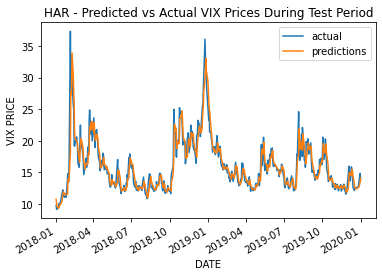

In [7]:
np.exp(test_har['CLOSE']).plot(label="actual")
np.exp(test_har['PRED']).plot(label="predictions")
plt.legend(loc="upper right")
plt.ylabel('VIX PRICE')
plt.title('HAR - Predicted vs Actual VIX Prices During Test Period')